In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/heart.csv")  # replace with your file path
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


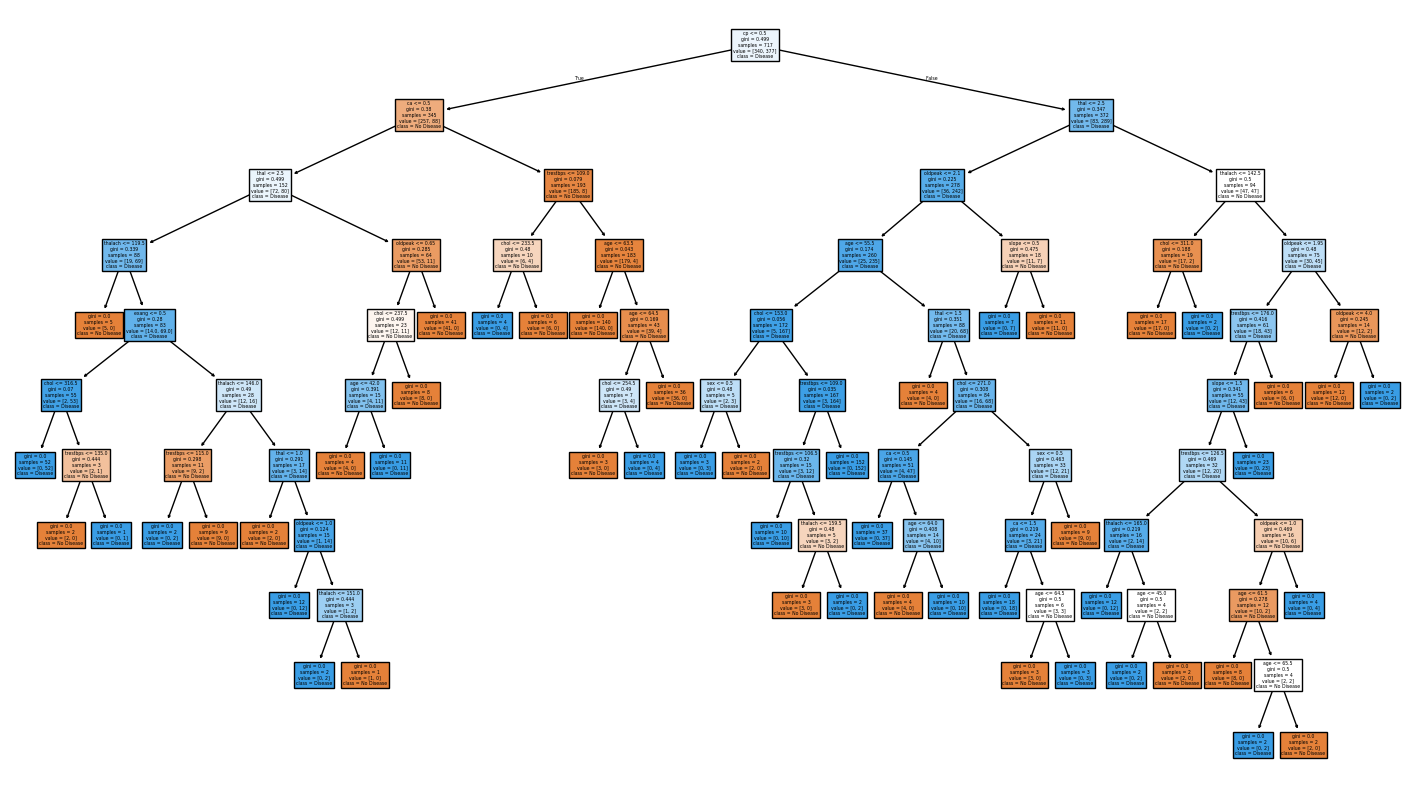

In [5]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(18,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


In [6]:
# Overfit model
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)
print("Overfit Test Accuracy:", accuracy_score(y_test, dt_overfit.predict(X_test)))

# Limited depth
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
print("Limited Depth Test Accuracy:", accuracy_score(y_test, dt_limited.predict(X_test)))


Overfit Test Accuracy: 0.9707792207792207
Limited Depth Test Accuracy: 0.8344155844155844


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Test Accuracy: 0.9805194805194806


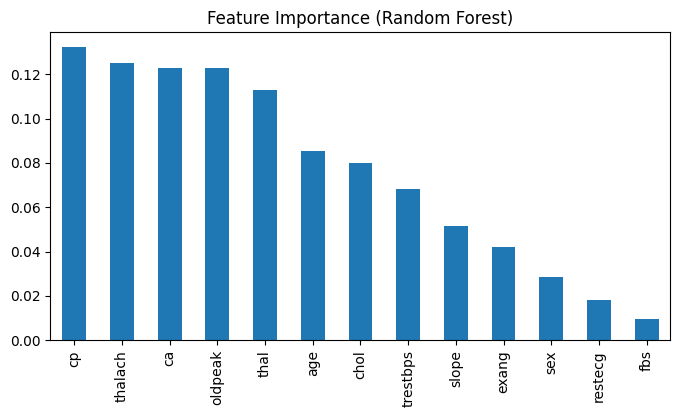

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance (Random Forest)")
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


CV Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
Std Dev: 0.005853658536585371
